In [92]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [93]:
df = pd.read_csv(Path("../Data/Clean_Data_Science_Salaries.csv"))
df

,Job Title,Experience Level,Salary,Company Location,Company Size,Year
0,Data Engineer,Senior,210000,United States,Medium,2023
1,Data Engineer,Senior,165000,United States,Medium,2023
2,Data Engineer,Senior,185900,United States,Medium,2023
3,Data Engineer,Senior,129300,United States,Medium,2023
4,Data Scientist,Senior,140000,United States,Medium,2023
...,...,...,...,...,...,...
2437,Applied Machine Learning Scientist,Mid,423000,United States,Large,2021
2438,Data Specialist,Senior,165000,United States,Large,2021
2439,Data Scientist,Senior,412000,United States,Large,2020
2440,Principal Data Scientist,Mid,151000,United States,Large,2021


In [94]:
df = df.rename(columns={"Job Title": "job_title", 
                   "Experience Level": "experience_level",
                   "Company Location": 'company_location', 
                   "Company Size": "company_size"})
df

,job_title,experience_level,Salary,company_location,company_size,Year
0,Data Engineer,Senior,210000,United States,Medium,2023
1,Data Engineer,Senior,165000,United States,Medium,2023
2,Data Engineer,Senior,185900,United States,Medium,2023
3,Data Engineer,Senior,129300,United States,Medium,2023
4,Data Scientist,Senior,140000,United States,Medium,2023
...,...,...,...,...,...,...
2437,Applied Machine Learning Scientist,Mid,423000,United States,Large,2021
2438,Data Specialist,Senior,165000,United States,Large,2021
2439,Data Scientist,Senior,412000,United States,Large,2020
2440,Principal Data Scientist,Mid,151000,United States,Large,2021


In [95]:
# Create column where 0 is salary under 100K and 1 is salary over 100K
salary_100K = []
for salary in df['Salary']:
    if salary < 100000:
        salary_100K.append('0')
    else:
        salary_100K.append('1')

df['over_100K'] = salary_100K
df.value_counts("over_100K")


over_100K
1    2083
0     359
dtype: int64

In [96]:
# Create column where 0 is salary under 150K and 1 is salary over 150K
salary_150K = []
for salary in df['Salary']:
    if salary < 150000:
        salary_150K.append('0')
    else:
        salary_150K.append('1')

df['over_150K'] = salary_150K
df.value_counts("over_150K")

over_150K
1    1276
0    1166
dtype: int64

In [97]:
# Change experience level values to numerical values
# 0-Entry, 1-Mid, 2-Senior, 3-Executive 

experience = []
for exp in df['experience_level']:
    if exp == 'Entry':
        experience.append('0')
    elif exp == 'Mid':
        experience.append('1')
    elif exp == 'Senior':
        experience.append('2')   
    else:
        experience.append('3')  

df['experience_level'] = experience
df


,job_title,experience_level,Salary,company_location,company_size,Year,over_100K,over_150K
0,Data Engineer,2,210000,United States,Medium,2023,1,1
1,Data Engineer,2,165000,United States,Medium,2023,1,1
2,Data Engineer,2,185900,United States,Medium,2023,1,1
3,Data Engineer,2,129300,United States,Medium,2023,1,0
4,Data Scientist,2,140000,United States,Medium,2023,1,0
...,...,...,...,...,...,...,...,...
2437,Applied Machine Learning Scientist,1,423000,United States,Large,2021,1,1
2438,Data Specialist,2,165000,United States,Large,2021,1,1
2439,Data Scientist,2,412000,United States,Large,2020,1,1
2440,Principal Data Scientist,1,151000,United States,Large,2021,1,1


In [98]:
# Change company size values to numerical values
# 0-Small, 1-Medium, 2-Large

company_size = []
for size in df['company_size']:
    if size == 'Small':
        company_size.append('0')
    elif size == 'Medium':
        company_size.append('1')  
    else:
        company_size.append('2')  

df['company_size'] = company_size
df


,job_title,experience_level,Salary,company_location,company_size,Year,over_100K,over_150K
0,Data Engineer,2,210000,United States,1,2023,1,1
1,Data Engineer,2,165000,United States,1,2023,1,1
2,Data Engineer,2,185900,United States,1,2023,1,1
3,Data Engineer,2,129300,United States,1,2023,1,0
4,Data Scientist,2,140000,United States,1,2023,1,0
...,...,...,...,...,...,...,...,...
2437,Applied Machine Learning Scientist,1,423000,United States,2,2021,1,1
2438,Data Specialist,2,165000,United States,2,2021,1,1
2439,Data Scientist,2,412000,United States,2,2020,1,1
2440,Principal Data Scientist,1,151000,United States,2,2021,1,1


In [99]:
# Replace job titles with less than 50 instances with 'Other'
job_title_counts = df.value_counts("job_title")
titles_to_replace = [job_title_counts[job_title_counts<50].index]

for title in titles_to_replace:
    df['job_title'] = df['job_title'].replace(title,"Other")

df.value_counts("job_title")

job_title
Data Engineer                554
Other                        539
Data Scientist               463
Data Analyst                 355
Machine Learning Engineer    214
Analytics Engineer           108
Research Scientist            80
Data Architect                76
Data Science Manager          53
dtype: int64

In [100]:
df 

,job_title,experience_level,Salary,company_location,company_size,Year,over_100K,over_150K
0,Data Engineer,2,210000,United States,1,2023,1,1
1,Data Engineer,2,165000,United States,1,2023,1,1
2,Data Engineer,2,185900,United States,1,2023,1,1
3,Data Engineer,2,129300,United States,1,2023,1,0
4,Data Scientist,2,140000,United States,1,2023,1,0
...,...,...,...,...,...,...,...,...
2437,Other,1,423000,United States,2,2021,1,1
2438,Other,2,165000,United States,2,2021,1,1
2439,Data Scientist,2,412000,United States,2,2020,1,1
2440,Other,1,151000,United States,2,2021,1,1


In [101]:
# df.to_csv('../Data/Converted_Data_Science_Salaries.csv', index=False)

First logistic regression model is trying to predict whether salary is over 150K or not using whole dataset.

In [102]:
# Create dummy columns for categorical columns and drop unnecessary columns.
df_dummies_150K = pd.get_dummies(df, columns=['job_title', 'company_location'])
df_dummies_150K = df_dummies_150K.drop(columns=['Salary', 'over_100K'])
df_dummies_150K

,experience_level,company_size,Year,over_150K,job_title_Analytics Engineer,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist,company_location_Australia,company_location_Canada,company_location_France,company_location_Germany,company_location_Japan,company_location_United States
0,2,1,2023,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2,1,2023,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,1,2023,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2,1,2023,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2,1,2023,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,1,2,2021,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2438,2,2,2021,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2439,2,2,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2440,1,2,2021,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [103]:
y = df_dummies_150K["over_150K"]
X = df_dummies_150K.drop(columns=["over_150K"])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(1831, 18)

In [105]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [106]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6695794647733478
Testing Data Score: 0.6579378068739771


In [107]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,0,1
3,1,1
4,1,0
5,1,0
6,1,0
7,1,0
8,0,0
9,1,1


In [108]:
print(confusion_matrix(y_test, predictions))

[[140 152]
 [ 57 262]]


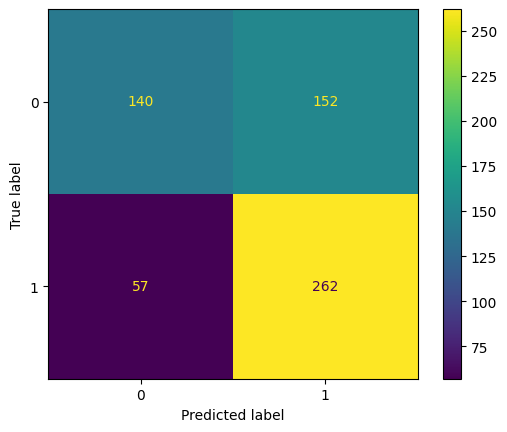

In [109]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=classifier.classes_)
disp.plot()

plt.show()

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57       292
           1       0.63      0.82      0.71       319

    accuracy                           0.66       611
   macro avg       0.67      0.65      0.64       611
weighted avg       0.67      0.66      0.65       611



Second logistic regression model is attempting to predict whether an entry level job has salary over 100K.

In [81]:
# Filter to only experience level = 0 (Entry)
df_entry = df[(df['experience_level'] == '0')]
df_entry

,job_title,experience_level,Salary,company_location,company_size,Year,over_100K,over_150K
214,Data Analyst,0,90000,United States,1,2023,0,0
215,Data Analyst,0,60000,United States,1,2023,0,0
280,Data Engineer,0,80000,United States,1,2023,0,0
281,Data Engineer,0,52500,United States,1,2023,0,0
331,Research Scientist,0,200000,United States,1,2023,1,1
...,...,...,...,...,...,...,...,...
2402,Data Scientist,0,100000,United States,1,2021,1,0
2403,Data Analyst,0,72000,United States,2,2020,0,0
2412,Machine Learning Engineer,0,81000,United States,0,2021,0,0
2413,Other,0,90000,United States,0,2021,0,0


In [82]:
# Create dummy columns for categorical columns and drop unneeded columns.
df_dummies_100K = pd.get_dummies(df_entry, columns=['job_title', 'company_location'])
df_dummies_100K = df_dummies_100K.drop(columns=['Salary', 'experience_level', 'over_150K'])
df_dummies_100K

,company_size,Year,over_100K,job_title_Analytics Engineer,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist,company_location_Germany,company_location_United States
214,1,2023,0,0,1,0,0,0,0,0,0,1
215,1,2023,0,0,1,0,0,0,0,0,0,1
280,1,2023,0,0,0,1,0,0,0,0,0,1
281,1,2023,0,0,0,1,0,0,0,0,0,1
331,1,2023,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,1,2021,1,0,0,0,1,0,0,0,0,1
2403,2,2020,0,0,1,0,0,0,0,0,0,1
2412,0,2021,0,0,0,0,0,1,0,0,0,1
2413,0,2021,0,0,0,0,0,0,1,0,0,1


In [83]:
y = df_dummies_100K["over_100K"]
X = df_dummies_100K.drop(columns=["over_100K"])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(113, 11)

In [85]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [86]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6548672566371682
Testing Data Score: 0.7105263157894737


In [87]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,1
1,0,0
2,0,0
3,1,0
4,0,1
5,0,0
6,1,1
7,0,1
8,0,0
9,0,0


In [88]:
print(confusion_matrix(y_test, predictions))

[[16  4]
 [ 7 11]]


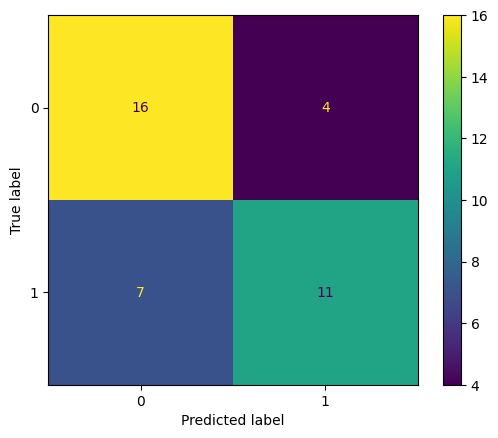

In [91]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=classifier.classes_)
disp.plot()

plt.show()

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.73      0.61      0.67        18

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38

